In [27]:
import sys, os
sys.path.append(os.path.abspath("/afs/desy.de/user/z/zhuxinyu/public/mass_reco/"))
import numpy as np
import ROOT
from ROOT import TCanvas, TLegend, TFile, TPaveLabel, TPaveText, TTree, TLorentzVector, TH1D, TVectorT, gStyle, THStack, gPad, TH2D
from ROOT import gROOT
import helper
import math
import time
start_time = time.time()


In [28]:
filename = "../output.root"
file = TFile(filename)
tree = file.Get("nominal")
print(tree.GetEntries())

258576


In [29]:
# hists
# 1. m_ttbar
m_ttbars = []
m_ttbar_Yt0  = TH1D ("m_ttbar_Yt0","m_ttbar_Yt0" ,40, 340, 850)
m_ttbar_Yt1  = TH1D ("m_ttbar_Yt1","m_ttbar_Yt1" ,40, 340, 850)
m_ttbar_Yt2  = TH1D ("m_ttbar_Yt2","m_ttbar_Yt2" ,40, 340, 850)
m_ttbar_Yt3  = TH1D ("m_ttbar_Yt3","m_ttbar_Yt3" ,40, 340, 850)
m_ttbar_Yt4  = TH1D ("m_ttbar_Yt4","m_ttbar_Yt4" ,40, 340, 850)
m_ttbars = [m_ttbar_Yt0, m_ttbar_Yt1, m_ttbar_Yt2, m_ttbar_Yt3, m_ttbar_Yt4]

# 1.5 m_t
m_bbll_truth_Yt0  = TH1D ("m_bbll_truth_Yt0","m_bbll_truth_Yt0" ,40, 200, 850)
m_bbll_truth_Yt1  = TH1D ("m_bbll_truth_Yt1","m_bbll_truth_Yt1" ,40, 200, 850)
m_bbll_truth_Yt2  = TH1D ("m_bbll_truth_Yt2","m_bbll_truth_Yt2" ,40, 200, 850)
m_bbll_truth_Yt3  = TH1D ("m_bbll_truth_Yt3","m_bbll_truth_Yt3" ,40, 200, 850)
m_bbll_truth_Yt4  = TH1D ("m_bbll_truth_Yt4","m_bbll_truth_Yt4" ,40, 200, 850)
m_bbll_truths = [m_bbll_truth_Yt0, m_bbll_truth_Yt1, m_bbll_truth_Yt2, m_bbll_truth_Yt3, m_bbll_truth_Yt4]

# 2. m_bl_minimax
m_bbll_Yt0  = TH1D ("m_bbll_Yt0", "masses of reco level bbll", 40, 200, 850)
m_bbll_Yt1  = TH1D ("m_bbll_Yt1", "masses of reco level bbll", 40, 200, 850)
m_bbll_Yt2  = TH1D ("m_bbll_Yt2", "masses of reco level bbll", 40, 200, 850)
m_bbll_Yt3  = TH1D ("m_bbll_Yt3", "masses of reco level bbll", 40, 200, 850)
m_bbll_Yt4  = TH1D ("m_bbll_Yt4", "masses of reco level bbll", 40, 200, 850)
m_bblls = [m_bbll_Yt0, m_bbll_Yt1, m_bbll_Yt2, m_bbll_Yt3, m_bbll_Yt4]


In [30]:
for n in range(250000):
     
     tree.GetEntry(n)
     yt_weights = [getattr(tree, "t_yt_reweight0"), getattr(tree, "t_yt_reweight1"), getattr(tree, "t_yt_reweight2") , getattr(tree, "t_yt_reweight3"), getattr(tree, "t_yt_reweight4")]
     
     m_ttbar = getattr(tree, "MC_ttbar_beforeFSR_m")/1000
     p4s_lep = helper.GetLorenzP4List(tree, 'lep')
     p4s_bjet = helper.GetLorenzP4List(tree,'bjet')

     ## 1. truth level llbb
     p4s_truth_b = []
     p4s_truth_b.append(helper.p4_from_pt_eta_phi_m(tree, "MC_b_from_t"))
     p4s_truth_b.append(helper.p4_from_pt_eta_phi_m(tree, "MC_b_from_tbar"))
     prefixes = ['MC_Wdecay1_from_t', 'MC_Wdecay2_from_t', 'MC_Wdecay1_from_tbar','MC_Wdecay2_from_tbar']
     p4s_truth_lep = helper.get_leptons_from_truth(prefixes, tree) # [lep from t, lep from tbar]

     
     ## minimax
     if len(p4s_lep) !=2 or len(p4s_bjet) != 2 or len(p4s_truth_b)!=2 or len(p4s_truth_lep)!=2 : continue


     p4s_bbll_truth = p4s_truth_b[0] + p4s_truth_lep[0] + p4s_truth_b[1] + p4s_truth_lep[1]
     p4s_bbll_reco = p4s_bjet[0] + p4s_lep[0] + p4s_bjet[1] + p4s_lep[1]


     for i in range(5):
          m_ttbars[i].Fill(m_ttbar, yt_weights[i])
          m_bbll_truths[i].Fill(p4s_bbll_truth.M()/1000, yt_weights[i])
          m_bblls[i].Fill(p4s_bbll_reco.M()/1000, yt_weights[i])
     

     if (not(n % 5000)): 
        print("event:", n, "--- %.2f seconds ---" % (time.time() - start_time))

  

event: 0 --- 0.42 seconds ---
event: 5000 --- 2.84 seconds ---
event: 15000 --- 7.53 seconds ---
event: 20000 --- 9.90 seconds ---
event: 30000 --- 14.73 seconds ---
event: 35000 --- 17.08 seconds ---
event: 40000 --- 19.44 seconds ---
event: 60000 --- 28.86 seconds ---
event: 65000 --- 31.22 seconds ---
event: 70000 --- 33.57 seconds ---
event: 75000 --- 35.92 seconds ---
event: 80000 --- 39.55 seconds ---
event: 85000 --- 41.90 seconds ---
event: 90000 --- 44.25 seconds ---
event: 95000 --- 46.59 seconds ---
event: 100000 --- 48.93 seconds ---
event: 105000 --- 51.26 seconds ---
event: 110000 --- 53.61 seconds ---
event: 115000 --- 55.96 seconds ---
event: 120000 --- 58.30 seconds ---
event: 125000 --- 60.66 seconds ---
event: 130000 --- 63.00 seconds ---
event: 135000 --- 65.36 seconds ---
event: 140000 --- 67.72 seconds ---
event: 145000 --- 70.07 seconds ---
event: 150000 --- 72.42 seconds ---
event: 155000 --- 75.73 seconds ---
event: 165000 --- 80.41 seconds ---
event: 170000 --

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


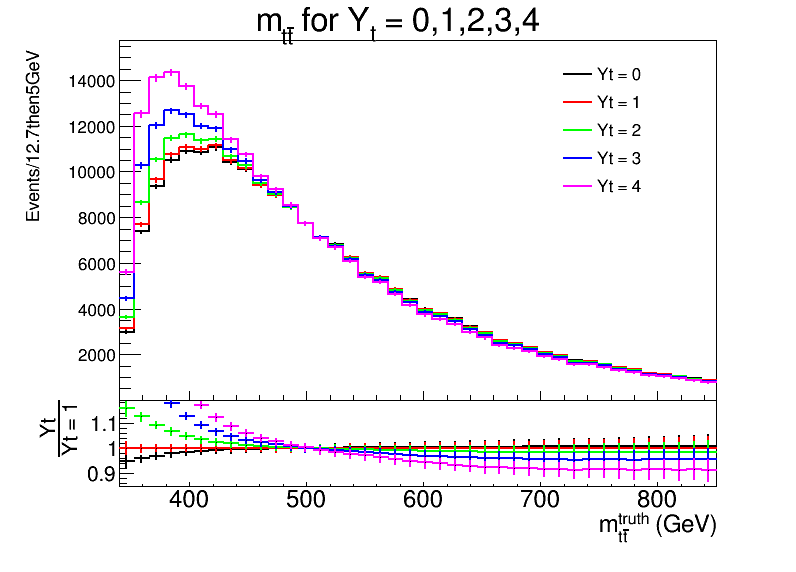

In [46]:
c = ROOT.TCanvas("c", "c", 800, 600)
# Divide the canvas into two pads: one for the upper plot, one for the lower plot
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0)  # Remove the space between the plots
pad1.SetLeftMargin(0.15)
pad1.Draw()
pad1.cd()
m_ttbars[0].SetTitle("m_{t#bar{t}} for Y_{t} = 0,1,2,3,4")
gStyle.SetTitleFontSize(0.08)

m_ttbars[0].GetYaxis().SetLabelSize(0.045)
m_ttbars[0].Draw()
m_ttbars[0].GetYaxis().SetTitle("Events/12.7then5GeV")
m_ttbars[0].GetYaxis().SetTitleSize(0.05)
m_ttbars[0].GetYaxis().SetRangeUser(0.01, m_ttbars[4].GetMaximum()*1.1)

leg = TLegend(0.7,0.5,0.9,0.85)
colors = [1, 2, 3, 4, 6]
for i, color in enumerate(colors):
    m_ttbars[i].SetLineWidth(2)
    m_ttbars[i].SetLineColor(color)
    m_ttbars[i].Draw("same h")
    leg.AddEntry(m_ttbars[i],"Yt = "+ str(i), "l")
leg.SetBorderSize(0)
leg.Draw()

# Lower plot
c.cd()
pad2 = ROOT.TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(0)  # Remove the space between the plots
pad2.SetBottomMargin(0.4)
pad2.Draw()
pad2.cd()
pad2.SetLeftMargin(0.15)
gStyle.SetOptStat(0)

ratios = []

for i in range(5):
    ratios.append(m_ttbars[i].Clone("ratio"+str(i)))
for i, ratio in enumerate(ratios): 
    # ratio = helper.ratio_beautify(ratio)
    ratio.SetStats(False)
    ratio.SetTitle("")
    ratio.GetXaxis().SetLabelOffset(0.005)
    ratio.GetXaxis().SetLabelSize(0.18)
    # ratio.GetXaxis().SetTitleOffset(1.1)
    ratio.GetXaxis().SetTitleSize(0.18)
    ratio.GetYaxis().SetLabelSize(0.16)
    ratio.GetYaxis().SetTitleSize(0.16)
    ratio.GetYaxis().SetTitleOffset(0.3)
    ratio.GetYaxis().SetNdivisions(506)
    ratio.GetYaxis().SetTitle("#frac{Yt}{Yt = 1 }")
    ratio.GetXaxis().SetTitle("m_{t#bar{t}}^{truth} (GeV)")
    ratio.GetYaxis().SetRangeUser(0.85, 1.19)
    ratio.Divide(m_ttbars[1])
    ratio.Draw("same")

# ref = theta_bl_truth.Clone("ref")
# ref.Divide(theta_bl_truth)
# ref.Draw("same")distribution
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


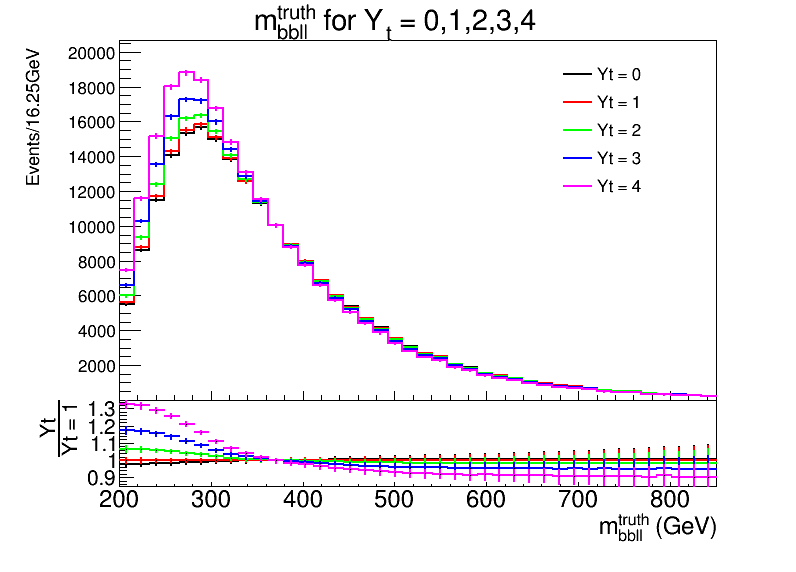

In [49]:
c = ROOT.TCanvas("c", "c", 800, 600)
# Divide the canvas into two pads: one for the upper plot, one for the lower plot
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0)  # Remove the space between the plots
pad1.SetLeftMargin(0.15)
pad1.Draw()
pad1.cd()
m_bbll_truths[0].SetTitle("m_{bbll}^{truth} for Y_{t} = 0,1,2,3,4")
gStyle.SetTitleFontSize(0.07)

m_bbll_truths[0].GetYaxis().SetLabelSize(0.045)
m_bbll_truths[0].Draw()
m_bbll_truths[0].GetYaxis().SetTitle("Events/16.25GeV")
m_bbll_truths[0].GetYaxis().SetTitleSize(0.05)
m_bbll_truths[0].GetYaxis().SetRangeUser(0.01, m_bbll_truths[4].GetMaximum()*1.1)

leg = TLegend(0.7,0.5,0.9,0.85)
colors = [1, 2, 3, 4, 6]
for i, color in enumerate(colors):
    m_bbll_truths[i].SetLineWidth(2)
    m_bbll_truths[i].SetLineColor(color)
    m_bbll_truths[i].Draw("same h")
    leg.AddEntry(m_bbll_truths[i],"Yt = "+ str(i), "l")
leg.SetBorderSize(0)
leg.Draw()

# Lower plot
c.cd()
pad2 = ROOT.TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(0)  # Remove the space between the plots
pad2.SetBottomMargin(0.4)
pad2.Draw()
pad2.cd()
pad2.SetLeftMargin(0.15)
gStyle.SetOptStat(0)

ratios = []

for i in range(5):
    ratios.append(m_bbll_truths[i].Clone("ratio"+str(i)))
for i, ratio in enumerate(ratios): 
    # ratio = helper.ratio_beautify(ratio)
    ratio.SetStats(False)
    ratio.SetTitle("")
    ratio.GetXaxis().SetLabelOffset(0.005)
    ratio.GetXaxis().SetLabelSize(0.18)
    # ratio.GetXaxis().SetTitleOffset(1.1)
    ratio.GetXaxis().SetTitleSize(0.18)
    ratio.GetYaxis().SetLabelSize(0.16)
    ratio.GetYaxis().SetTitleSize(0.16)
    ratio.GetYaxis().SetTitleOffset(0.3)
    ratio.GetYaxis().SetNdivisions(506)
    ratio.GetYaxis().SetTitle("#frac{Yt}{Yt = 1 }")
    ratio.GetXaxis().SetTitle("m_{bbll}^{truth} (GeV)")
    ratio.GetYaxis().SetRangeUser(0.85, 1.35)
    ratio.Divide(m_bbll_truths[1])
    ratio.Draw("same")

# ref = theta_bl_truth.Clone("ref")
# ref.Divide(theta_bl_truth)
# ref.Draw("same")distribution
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


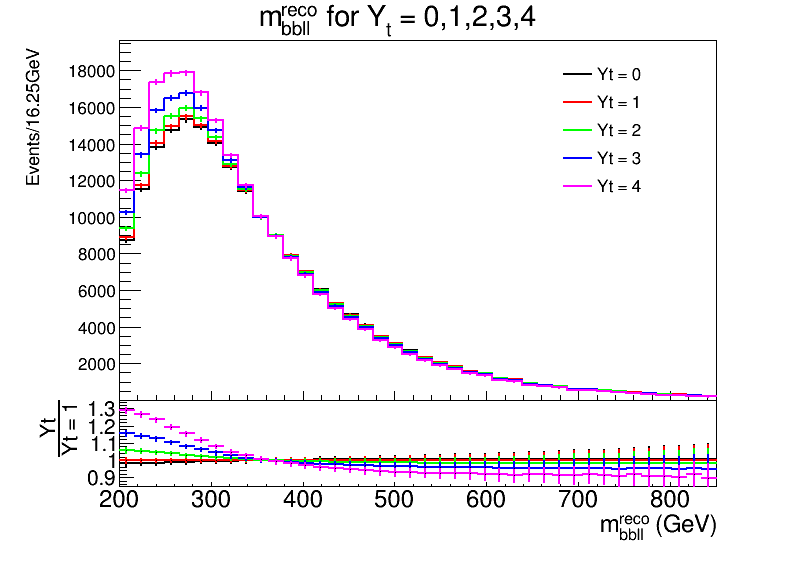

In [50]:
c = ROOT.TCanvas("c", "c", 800, 600)
# Divide the canvas into two pads: one for the upper plot, one for the lower plot
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0)  # Remove the space between the plots
pad1.SetLeftMargin(0.15)
pad1.Draw()
pad1.cd()
m_bblls[0].SetTitle("m_{bbll}^{reco} for Y_{t} = 0,1,2,3,4")
gStyle.SetTitleFontSize(0.07)

m_bblls[0].GetYaxis().SetLabelSize(0.045)
m_bblls[0].Draw()
m_bblls[0].GetYaxis().SetTitle("Events/16.25GeV")
m_bblls[0].GetYaxis().SetTitleSize(0.05)
m_bblls[0].GetYaxis().SetRangeUser(0.01, m_bblls[4].GetMaximum()*1.1)

leg = TLegend(0.7,0.5,0.9,0.85)
colors = [1, 2, 3, 4, 6]
for i, color in enumerate(colors):
    m_bblls[i].SetLineWidth(2)
    m_bblls[i].SetLineColor(color)
    m_bblls[i].Draw("same h")
    leg.AddEntry(m_bblls[i],"Yt = "+ str(i), "l")
leg.SetBorderSize(0)
leg.Draw()

# Lower plot
c.cd()
pad2 = ROOT.TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(0)  # Remove the space between the plots
pad2.SetBottomMargin(0.4)
pad2.Draw()
pad2.cd()
pad2.SetLeftMargin(0.15)
gStyle.SetOptStat(0)

ratios = []

for i in range(5):
    ratios.append(m_bblls[i].Clone("ratio"+str(i)))
for i, ratio in enumerate(ratios): 
    # ratio = helper.ratio_beautify(ratio)
    ratio.SetStats(False)
    ratio.SetTitle("")
    ratio.GetXaxis().SetLabelOffset(0.005)
    ratio.GetXaxis().SetLabelSize(0.18)
    # ratio.GetXaxis().SetTitleOffset(1.1)
    ratio.GetXaxis().SetTitleSize(0.18)
    ratio.GetYaxis().SetLabelSize(0.16)
    ratio.GetYaxis().SetTitleSize(0.16)
    ratio.GetYaxis().SetTitleOffset(0.3)
    ratio.GetYaxis().SetNdivisions(506)
    ratio.GetYaxis().SetTitle("#frac{Yt}{Yt = 1 }")
    ratio.GetXaxis().SetTitle("m_{bbll}^{reco} (GeV)")
    ratio.GetYaxis().SetRangeUser(0.85, 1.35)
    ratio.Divide(m_bblls[1])
    ratio.Draw("same")

# ref = theta_bl_truth.Clone("ref")
# ref.Divide(theta_bl_truth)
# ref.Draw("same")distribution
c.Draw()